# Subset Simulation Example 1
Author: Michael D. Shields
Date: May 23, 2018

This example runs subset simulation with the component-wise modified Metropolis-Hastings algorithm for MCMC to estimate the probability of failure of a system with linear performance function and 2-dimensional standard unit normal random variables, $U_i$ given by:

$ g(U) = \beta\sqrt{n} -\sum_{j=1}^2U_i$

$\beta=3$ corresponding to a true probability of failure $p_f=\Phi(-3)=0.0013$.

In this example, all samples are drawn internally in the SubsetSimulation class. The initial samples, i.e. level 0, can be drawn previously and passed into the SubsetSimulation class. This is illustrated in SubsetSimulation_Example3.ipynb.

Import the necessary libraries

In [16]:
from UQpy.Reliability import SubsetSimulation
import matplotlib.pyplot as plt
import numpy as np
import time

Here, we use 1000 samples per subset and call the performance function using a Python script (provided) called 'pfn.py' that evaluates $g(U)$ as defined above. The conditional probabilities for each level are 

In [25]:
mu = np.zeros(2)
C = np.identity(2)
import scipy.stats as stats
def JointNormal(x, params):
    return stats.multivariate_normal.pdf(x, params[0], params[1])
s = stats.multivariate_normal.rvs([0, 0], [[1, 0], [0, 1]], 1000)
t = time.time()
x_ss = SubsetSimulation(dimension=2, pdf_target_type='joint_pdf', pdf_target=JointNormal, pdf_target_params=[mu, C], nsamples_ss=1000, pdf_proposal_scale=1,
                            algorithm='MMH', model_type='python', model_script='pfn.py', p_cond=0.1, 
                       samples_init=s)
t_run = time.time()-t

UQpy: Running Subset Simulation....

Evaluating the model...

Successful execution of the MCMC design

Evaluating the model...



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Print the output attributes of x_ss.

In [5]:
print(t_run)
print(x_ss.pf)
print(x_ss.g_level)

3.116840124130249
0.0009010000000000002
[2.0867044467954869, 0.95793742737506715, 0.055258469526147103, -0.78206668713973393]


Plot the samples.

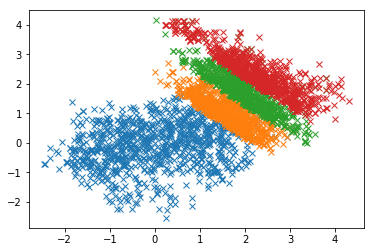

In [6]:
for i in range(len(x_ss.g_level)):
    plt.plot(x_ss.samples[i][:,0],x_ss.samples[i][:,1],'x')
plt.show()